In [47]:
# Import Librairies 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

#Adjusting the configuration of our plots
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

In [7]:
# Import our dataset
df = pd.read_csv('movies.csv')

In [9]:
# discovering our data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [11]:
# discovering our data
df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


In [16]:
#describe our data 
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7576 entries, 0 to 7661
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      7576 non-null   object
 1   rating    7576 non-null   object
 2   genre     7576 non-null   object
 3   year      7576 non-null   int64 
 4   released  7576 non-null   object
 5   score     7576 non-null   int64 
 6   votes     7576 non-null   int64 
 7   director  7576 non-null   object
 8   writer    7576 non-null   object
 9   star      7576 non-null   object
 10  country   7576 non-null   object
 11  budget    7576 non-null   int64 
 12  gross     7576 non-null   int64 
 13  company   7576 non-null   object
 14  runtime   7576 non-null   int64 
dtypes: int64(6), object(9)
memory usage: 947.0+ KB


# Data Cleaning

In [48]:
# The numbers of NaN values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [49]:
#Changing the data type

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['score'] = df['score'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [44]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5,2400,Scott Teems,Scott Teems,Shea Whigham,United States,35589876,3661,Prowess Pictures,98
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5,294,Scott Pryor,Scott Pryor,Scott Pryor,United States,35589876,413378,Pryor Entertainment,120
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6,35,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,78500541,Notis Studio,78
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3,447,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,35589876,13266,Roxwell Films,87


In [50]:
# Remove Rows with Missing Values 
df.dropna(inplace=True)

In [51]:
df.shape

(7576, 15)

In [52]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5,2400,Scott Teems,Scott Teems,Shea Whigham,United States,35589876,3661,Prowess Pictures,98
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5,294,Scott Pryor,Scott Pryor,Scott Pryor,United States,35589876,413378,Pryor Entertainment,120
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6,35,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,78500541,Notis Studio,78
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3,447,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,35589876,13266,Roxwell Films,87


In [61]:
# Order our Data a little bit to Analyse

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,I Want You,R,Crime,1998,"October 30, 1998 (United Kingdom)",6,2900,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,35589876,1672,Polygram Filmed Entertainment,87
2906,Pusher,Not Rated,Crime,1996,"August 30, 1996 (Denmark)",7,37000,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,35589876,1605,Balboa Entertainment,110
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5,735,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93


# Analysing the Correlation 

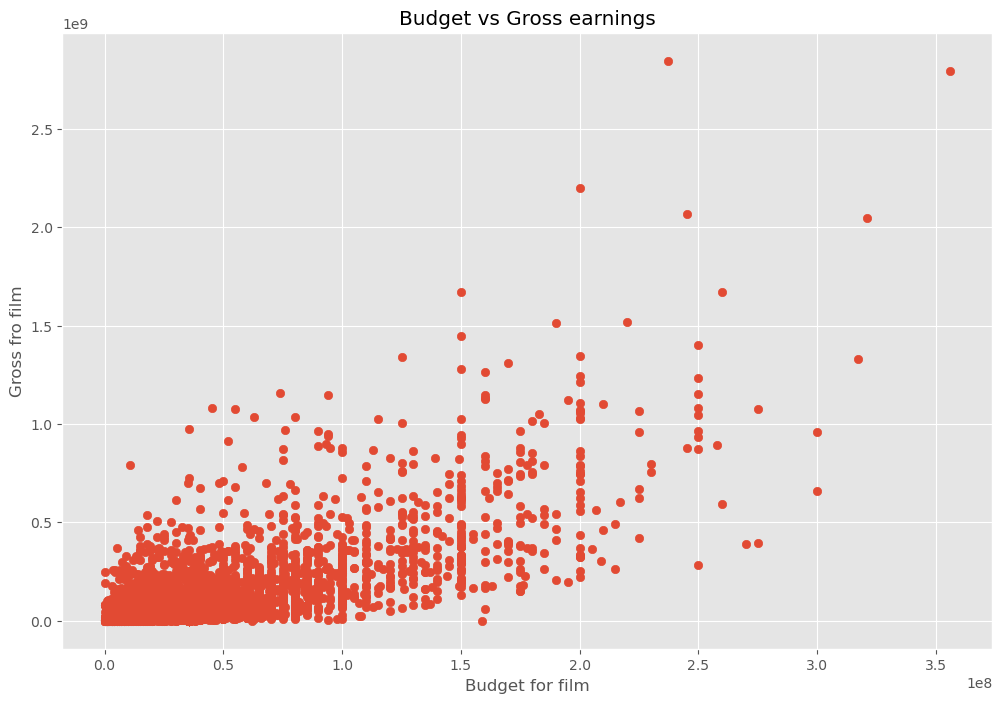

In [60]:
#Scatter plot (Budget vs Gross earning)
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross earnings')
plt.xlabel('Budget for film')
plt.ylabel('Gross fro film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

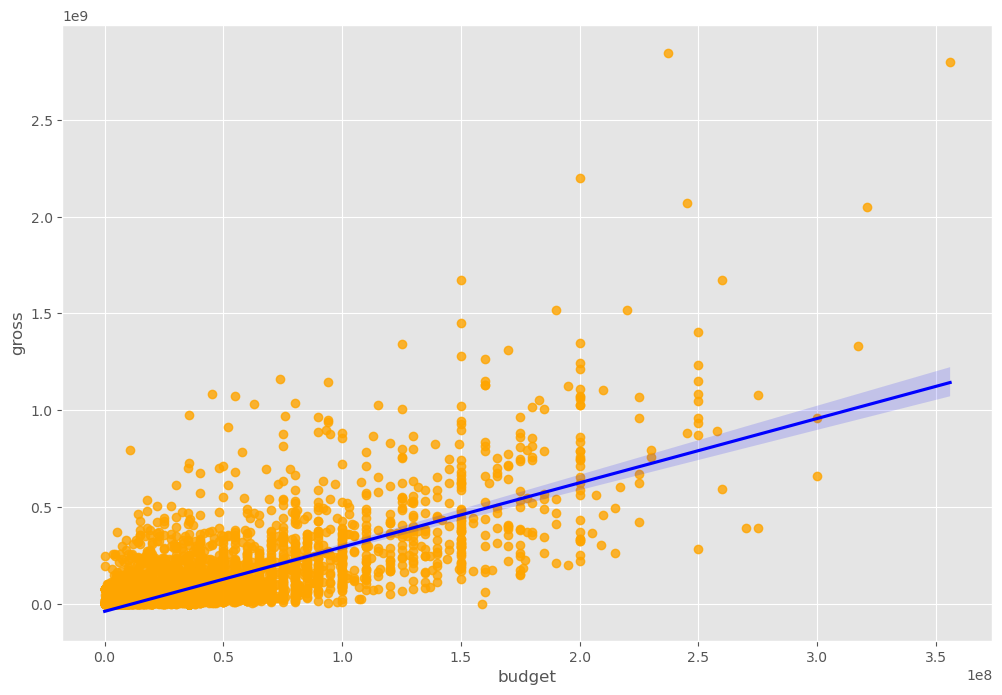

In [62]:
#seaborn plot (Budget vs Gross earning)

sns.regplot(x='budget', y='gross', data=df, scatter_kws= {"color": "orange"}, line_kws= {"color": "Blue" })

In [64]:
correlation_matrix = df.corr()

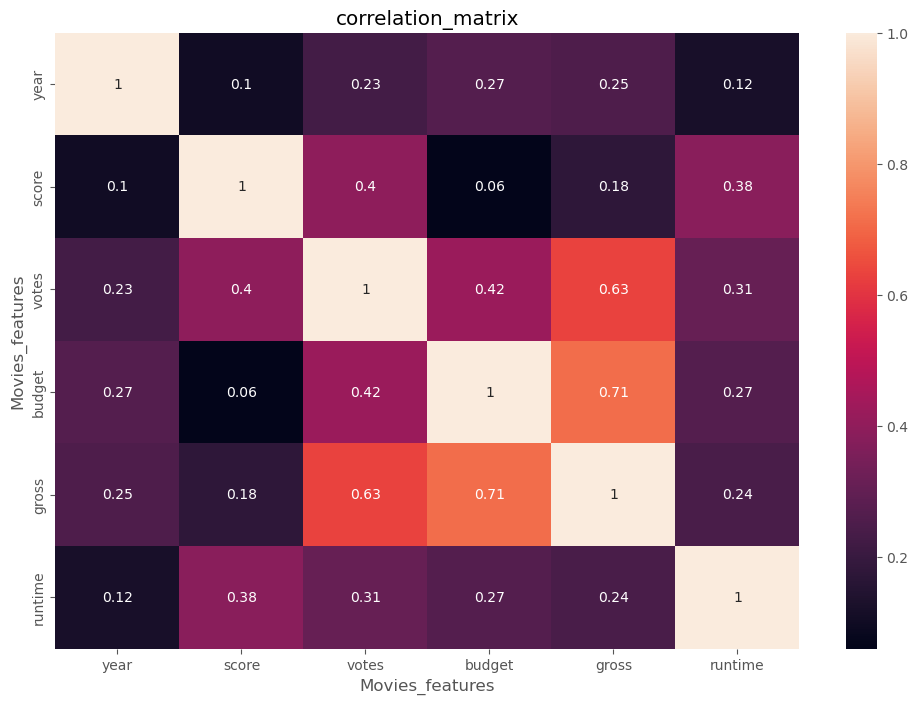

In [69]:
sns.heatmap(correlation_matrix, annot = True)
plt.title('correlation_matrix')
plt.xlabel('Movies_features')
plt.ylabel('Movies_features')
plt.show()

In [71]:
#normalize our features 

df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6508,6,6,1980,1685,8,927000,2545,3960,1022,54,19000000,46998772,2274,146
1,5500,6,1,1980,1472,5,65000,2234,1613,316,55,4500000,58853106,710,104
2,5075,4,0,1980,1751,8,1200000,1093,2535,1708,55,18000000,538375067,1506,124
3,282,4,4,1980,1472,7,221000,1279,1976,2198,55,3500000,83453539,1770,88
4,1016,6,4,1980,1523,7,108000,1037,511,398,55,6000000,39846344,1737,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,6401,6,5,2020,91,5,2400,2476,3828,2386,55,35589876,3661,1861,98
7656,6938,5,4,2020,1865,5,294,2471,3821,2327,55,35589876,413378,1863,120
7658,789,6,6,2020,1091,6,35,1740,1052,515,55,5000,78500541,1710,78
7659,2626,3,9,2020,2120,3,447,1586,2435,1500,55,35589876,13266,1949,87


In [79]:
df_numerized_corr = df_numerized.corr()
df_numerized_corr

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.011944,0.015250,0.013483,-0.009936,0.017050,0.013174,0.009605,0.010271,0.005666,-0.009942,0.020954,0.005071,0.010085,0.011130
rating,-0.011944,1.000000,0.117657,0.025120,0.024450,0.008636,0.016092,0.017211,-0.004538,0.005972,0.037765,-0.156385,-0.129384,-0.076860,0.069153
genre,0.015250,0.117657,1.000000,-0.088103,0.030843,0.035297,-0.148341,-0.013502,0.006956,-0.003450,-0.031503,-0.316818,-0.238240,-0.068755,-0.044528
year,0.013483,0.025120,-0.088103,1.000000,-0.001890,0.101622,0.226789,-0.022740,-0.012450,-0.027507,-0.070084,0.268848,0.254159,-0.009181,0.120808
released,-0.009936,0.024450,0.030843,-0.001890,1.000000,0.041518,0.016870,-0.001867,-0.003831,0.018129,-0.022073,0.013142,0.000520,-0.008693,0.000250
score,0.017050,0.008636,0.035297,0.101622,0.041518,1.000000,0.396063,0.015277,0.019751,-0.002078,-0.123011,0.059561,0.176330,-0.001307,0.383979
votes,0.013174,0.016092,-0.148341,0.226789,0.016870,0.396063,1.000000,-0.000628,0.000133,-0.020975,0.069563,0.421218,0.629325,0.129579,0.309353
director,0.009605,0.017211,-0.013502,-0.022740,-0.001867,0.015277,-0.000628,1.000000,0.297418,0.037564,0.015242,-0.010373,-0.014106,0.001328,0.017403
writer,0.010271,-0.004538,0.006956,-0.012450,-0.003831,0.019751,0.000133,0.297418,1.000000,0.026462,0.014936,-0.033407,-0.023732,0.003174,-0.004659
star,0.005666,0.005972,-0.003450,-0.027507,0.018129,-0.002078,-0.020975,0.037564,0.026462,1.000000,-0.017577,-0.017244,-0.002506,0.009243,0.008550


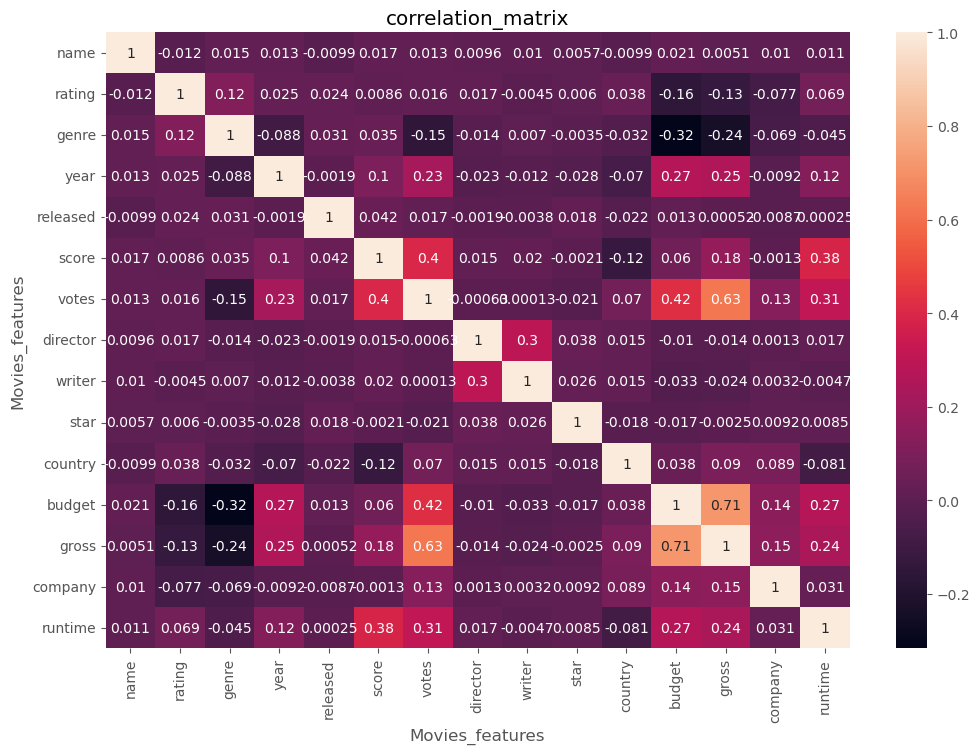

In [77]:
sns.heatmap(df_numerized_corr, annot = True)
plt.title('correlation_matrix')
plt.xlabel('Movies_features')
plt.ylabel('Movies_features')
plt.show()

In [82]:
corr_pairs = df_numerized_corr.unstack()
corr_pairs

name     name        1.000000
         rating     -0.011944
         genre       0.015250
         year        0.013483
         released   -0.009936
                       ...   
runtime  country    -0.081418
         budget      0.265933
         gross       0.241619
         company     0.030856
         runtime     1.000000
Length: 225, dtype: float64

In [83]:
corr_sorted = corr_pairs.sort_values()
corr_sorted

genre    budget    -0.316818
budget   genre     -0.316818
genre    gross     -0.238240
gross    genre     -0.238240
rating   budget    -0.156385
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [84]:
hight_corr = corr_sorted[(corr_sorted)> 0.5] 
hight_corr

gross     votes       0.629325
votes     gross       0.629325
budget    gross       0.712561
gross     budget      0.712561
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

There is no much correlation between Movies features, but we can see an acceptable correlation between gross and budget 71% , i think it's normal, if you put a big budget on a movie you are expecting a big gross too.

The same between votes and gross 63%, if the movie made a big gross that's mean he is gonna have good votes 